## Organoid Classifier with IMMETCOLS signature

In [1]:
import firmaIMC_v2 as firmaIMC
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Functions

In [2]:
def Calc_Prediction_IMC_SingleSample(pd_ranking_SET,df_allinfo_SET,dict_gens_Coincidents_SET,nomPacient="Pac1"):

    
    pd_prediction_SET=pd.DataFrame()
        
    pd_cas1=df_allinfo_SET.iloc[0:1]
        
        
    pd_rank1=Ranking_PATHS_IMC_SingleSample(pd_cas1,dict_gens_Coincidents_SET)
    corr_IMC1=pd_ranking_SET[["IMC1"]].corrwith(pd_rank1["ValPathWay"]).values[0]
    corr_IMC2=pd_ranking_SET[["IMC2"]].corrwith(pd_rank1["ValPathWay"]).values[0]
    corr_IMC3=pd_ranking_SET[["IMC3"]].corrwith(pd_rank1["ValPathWay"]).values[0]
    IMC_SSP='NA'
    if corr_IMC1 > corr_IMC2 and corr_IMC1 > corr_IMC3 :
        IMC_SSP="Cluster_1"
    if corr_IMC2 > corr_IMC1 and corr_IMC2 > corr_IMC3 :
        IMC_SSP="Cluster_2"
    if corr_IMC3 > corr_IMC1 and corr_IMC3 > corr_IMC2 :
        IMC_SSP="Cluster_3"

    pd_prediction_SET=pd.concat([pd_prediction_SET,pd.DataFrame( {"IMC_SSP":(IMC_SSP),
            'corrIMC1': (corr_IMC1), 'corrIMC2': (corr_IMC2), 'corrIMC3': (corr_IMC3) },index=[nomPacient]  ) ] )

    return pd_prediction_SET

def Ranking_PATHS_IMC_SingleSample(df_allinfo_SET,dict_path_gens,factorAug=2.0,verbose=False):
    """Ranking dels PATHS, Sense normalitzar gens.
    Retorna: Taula Pandas amb els paths (absolute valor)"""
    global mean_Path,mean_ALL,sel_gens
        
    pd_mean_Path=pd.DataFrame()
    
    for nom_path in dict_path_gens.keys():
        sel_gens=dict_path_gens[nom_path]
        if verbose==True:
            print('Nom path: {}, num. gens:{}'.format(nom_path,len(sel_gens)))   
    
        mean_Path=df_allinfo_SET[sel_gens].mean(axis=1)

        pd_mean_Path=pd.concat([pd_mean_Path,pd.DataFrame( {'ValPathWay': (mean_Path.values) }, index=[nom_path]   )] )
        # Values necesari, ja que guarda el index del dataframe. values treu el index.

    return pd_mean_Path

In [3]:
# Read data from files:
selected_gens=['GLS','TGFB1','TWIST1','GOT1','LDHA','GLUL','FAP','ZEB1','ZEB2', 'ENTPD1'] # Gens of IMMETCOLS Signature
dict_gens_inicial = json.load( open( "dict_gens.json" ) )
pd_ranking_GSE1=pd.read_excel('Ranking_IMMETCOLS_by_GSE1.xlsx',index_col=0)
pd_ranking_TCGA=pd.read_excel('Ranking_IMMETCOLS_by_TCGA.xlsx',index_col=0)

# Lectura Organoid

### Lectura dades Organoid CCR72

In [4]:
pd_CCR72=pd.read_csv('CCR72_EC_TPM_FPKM_bis.csv',sep=';')
pd_CCR72.index=pd_CCR72['hgnc_symbol']

#pd_CRC26.boxplot(
pd_CCR72['l2FPKM']=np.log2(pd_CCR72['FPKM']+1)
pd_CCR72['l2TPM']=np.log2(pd_CCR72['TPM']+1)

pd_10gens_CCR72=pd_CCR72[['l2FPKM','l2TPM']].loc[selected_gens]
pd_10gens_CCR72

,l2FPKM,l2TPM
hgnc_symbol,,
GLS,4.701549,4.776104
TGFB1,3.733354,3.805292
TWIST1,0.000000,0.000000
GOT1,6.410918,6.487679
LDHA,8.646847,8.724343
GLUL,5.699330,5.775577
FAP,1.803227,1.859970
ZEB1,0.014355,0.014355
ZEB2,0.014355,0.014355


In [5]:
pd_org_CCR72=pd_CCR72[['l2FPKM',"hgnc_symbol"]].transpose() #.loc(["l2FPKM"])
pd_org_CCR72=pd_org_CCR72.loc[["l2FPKM"]]   # Eliminar fila duplicada amb els noms dels gens

In [6]:
print("% of coincident gens")
dict_gens_Coincidents_CCR72={}
for ele in dict_gens_inicial.keys():
    print(ele)
    dict_gens_Coincidents_CCR72[ele]=firmaIMC.Commom_genes(dict_gens_inicial[ele],list(pd_CCR72['hgnc_symbol']))

% of coincident gens
Glycolysis
Num. gens: 200 de 200  100.00 % 
Lactate transport
Num. gens: 7 de 7  100.00 % 
Fatty Acid Oxidation
Num. gens: 16 de 16  100.00 % 
Glutamine metabolic
Num. gens: 78 de 79  98.73 % 
Glutamine transport
Num. gens: 9 de 9  100.00 % 
Glutamine catabolic
Num. gens: 26 de 27  96.30 % 
Glutamine biosynthesis
Num. gens: 18 de 18  100.00 % 
Pentose Phosphate
Num. gens: 27 de 27  100.00 % 
Oxphos
Num. gens: 103 de 103  100.00 % 
MYC targets
Num. gens: 200 de 200  100.00 % 
G2M checkpoint
Num. gens: 200 de 200  100.00 % 
E2F targets
Num. gens: 200 de 200  100.00 % 
ROS Pathway
Num. gens: 48 de 49  97.96 % 
MTORC1 signaling
Num. gens: 200 de 200  100.00 % 
---
Num. gens: 77 de 77  100.00 % 
CAF
Num. gens: 7 de 7  100.00 % 
Hypoxia
Num. gens: 200 de 200  100.00 % 
Hexosaminidase
Num. gens: 15 de 15  100.00 % 
EMT
Num. gens: 191 de 192  99.48 % 
TGFbeta signaling
Num. gens: 132 de 132  100.00 % 
Angiogenesis
Num. gens: 36 de 36  100.00 % 
ECM interactions
Num. gens: 

In [7]:
#Calc_Prediction_IMC_SingleSample(pd_ranking_GSE1,pd_org_CCR72,dict_gens_Coincidents_CCR72)

In [8]:
Calc_Prediction_IMC_SingleSample(pd_ranking_TCGA,pd_org_CCR72,dict_gens_Coincidents_CCR72)

,IMC_SSP,corrIMC1,corrIMC2,corrIMC3
Pac1,Cluster_3,0.653482,0.844152,0.873737


### Lectura dades Organoid CCR83

In [9]:
pd_CCR83=pd.read_csv('CCR83_EC_TPM_FPKM_bis.csv',sep=';')
pd_CCR83.index=pd_CCR83['hgnc_symbol']

#pd_CRC26.boxplot(
pd_CCR83['l2FPKM']=np.log2(pd_CCR83['FPKM']+1)
pd_CCR83['l2TPM']=np.log2(pd_CCR83['TPM']+1)

pd_10gens_CCR83=pd_CCR83[['l2FPKM','l2TPM']].loc[selected_gens]
pd_10gens_CCR83

,l2FPKM,l2TPM
hgnc_symbol,,
GLS,5.564378,5.839204
TGFB1,2.823749,3.066950
TWIST1,0.000000,0.000000
GOT1,5.604961,5.880196
LDHA,9.423116,9.703090
GLUL,6.164505,6.441284
FAP,0.042644,0.056584
ZEB1,0.137504,0.163499
ZEB2,0.042644,0.056584


In [10]:
pd_org_CCR83=pd_CCR83[['l2FPKM',"hgnc_symbol"]].transpose() #.loc(["l2FPKM"])
pd_org_CCR83=pd_org_CCR83.loc[["l2FPKM"]]   # Eliminar fila duplicada amb els noms dels gens

In [11]:
print("% of coincident gens")
dict_gens_Coincidents_CCR83={}
for ele in dict_gens_inicial.keys():
    print(ele)
    dict_gens_Coincidents_CCR83[ele]=firmaIMC.Commom_genes(dict_gens_inicial[ele],list(pd_CCR83['hgnc_symbol']))

% of coincident gens
Glycolysis
Num. gens: 200 de 200  100.00 % 
Lactate transport
Num. gens: 7 de 7  100.00 % 
Fatty Acid Oxidation
Num. gens: 16 de 16  100.00 % 
Glutamine metabolic
Num. gens: 78 de 79  98.73 % 
Glutamine transport
Num. gens: 9 de 9  100.00 % 
Glutamine catabolic
Num. gens: 26 de 27  96.30 % 
Glutamine biosynthesis
Num. gens: 18 de 18  100.00 % 
Pentose Phosphate
Num. gens: 27 de 27  100.00 % 
Oxphos
Num. gens: 103 de 103  100.00 % 
MYC targets
Num. gens: 200 de 200  100.00 % 
G2M checkpoint
Num. gens: 200 de 200  100.00 % 
E2F targets
Num. gens: 200 de 200  100.00 % 
ROS Pathway
Num. gens: 48 de 49  97.96 % 
MTORC1 signaling
Num. gens: 200 de 200  100.00 % 
---
Num. gens: 77 de 77  100.00 % 
CAF
Num. gens: 7 de 7  100.00 % 
Hypoxia
Num. gens: 200 de 200  100.00 % 
Hexosaminidase
Num. gens: 15 de 15  100.00 % 
EMT
Num. gens: 191 de 192  99.48 % 
TGFbeta signaling
Num. gens: 132 de 132  100.00 % 
Angiogenesis
Num. gens: 36 de 36  100.00 % 
ECM interactions
Num. gens: 

In [12]:
#Calc_Prediction_IMC_SingleSample(pd_ranking_GSE1,pd_org_CCR83,dict_gens_Coincidents_CCR83)

In [13]:
Calc_Prediction_IMC_SingleSample(pd_ranking_TCGA,pd_org_CCR83,dict_gens_Coincidents_CCR83)

,IMC_SSP,corrIMC1,corrIMC2,corrIMC3
Pac1,Cluster_3,0.687246,0.856558,0.88295


### Analisis dels gens IMC

### Figura log2 FPKM

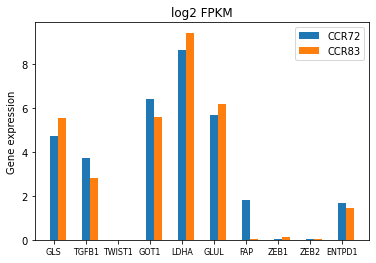

In [14]:
n = len(pd_10gens_CCR72.index)
x = np.arange(n)
width = 0.25
titulo='log2 FPKM'
plt.title(titulo)
plt.ylabel("Gene expression")
#crc26=pd_10gens_CRC26['l2FPKM'].values
crc72=pd_10gens_CCR72['l2FPKM'].values
crc83=pd_10gens_CCR83['l2FPKM'].values


#plt.bar(x - width, crc26, width=width, label='CRC26')
plt.bar(x, crc72, width=width, label='CCR72')
plt.bar(x + width, crc83, width=width, label='CCR83')
plt.xticks(x, pd_10gens_CCR72.index)
plt.legend(loc='best')
plt.tick_params(axis='x', labelsize=8)  # Adjust the fontsize here for x-axis labels
plt.savefig('FIGURE_1A_Genes.svg',dpi=600)
plt.savefig('FIGURE_1A_Genes.png',dpi=600)

plt.show()



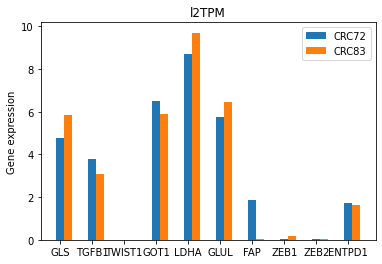

In [15]:
n = len(pd_10gens_CCR72.index)
x = np.arange(n)
width = 0.25
titulo='l2TPM'
plt.title(titulo)
plt.ylabel("Gene expression")
#crc26=pd_10gens_CRC26['l2TPM'].values
crc72=pd_10gens_CCR72['l2TPM'].values
crc83=pd_10gens_CCR83['l2TPM'].values


#plt.bar(x - width, crc26, width=width, label='CRC26')
plt.bar(x, crc72, width=width, label='CRC72')
plt.bar(x + width, crc83, width=width, label='CRC83')
plt.xticks(x, pd_10gens_CCR72.index)
plt.legend(loc='best')

plt.show()


## Ranking of Pathways of selected Organoids

In [16]:
rankingCRC72=Ranking_PATHS_IMC_SingleSample(pd_CCR72[['l2FPKM']].transpose(),dict_gens_Coincidents_CCR72)

In [17]:
rankingCRC83=Ranking_PATHS_IMC_SingleSample(pd_CCR83[['l2FPKM']].transpose(),dict_gens_Coincidents_CCR83)

## FIGURA

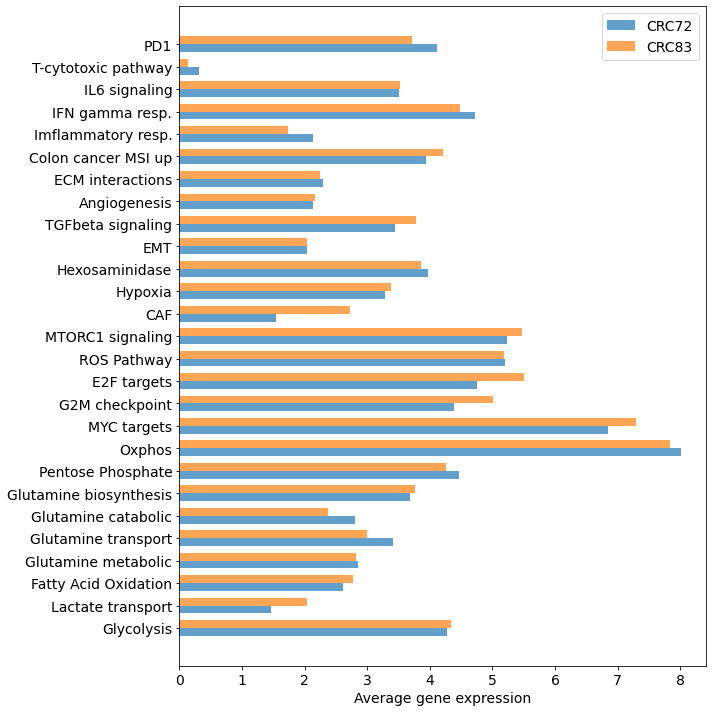

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming rankings are in 'l2FPKM' column
rankingCRC72_list = rankingCRC72.values.tolist()
rankingCRC83_list = rankingCRC83.values.tolist()

# Flatten the arrays
rankingCRC72_list = np.squeeze(rankingCRC72_list).tolist()
rankingCRC83_list = np.squeeze(rankingCRC83_list).tolist()

# Assuming nom_pathways contains the pathway names
pathways = rankingCRC72.index.tolist()

#Eliminar Separadores
pathways.pop(14)
pathways.pop(21)
rankingCRC72_list.pop(14)
rankingCRC72_list.pop(21)
rankingCRC83_list.pop(14)
rankingCRC83_list.pop(21)



# Creating a larger figure with higher height
fig, ax = plt.subplots(figsize=(10, 10))

# Creating bar plot
bar_height = 0.35
index = np.arange(len(pathways))

ax.barh(index, rankingCRC72_list, height=bar_height, label='CRC72', alpha=0.7)
ax.barh(index + bar_height, rankingCRC83_list, height=bar_height, label='CRC83', alpha=0.7)

# Adding labels and title
#ax.set_xlabel('Ranking Values')
ax.set_xlabel('Average gene expression',fontsize=14)
#ax.set_ylabel('Pathways')
#ax.set_title('Pathway Rankings for CRC72 and CRC83')
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(pathways, fontsize=14)  # Adjust the fontsize here
ax.tick_params(axis='x', labelsize=14)  # Adjust the fontsize here for x-axis labels
ax.legend(fontsize=14)

# Display the plot
plt.tight_layout()

plt.savefig('FIGURE_1B_Pathways.png',dpi=600)
plt.savefig('FIGURE_1B_Pathways.svg',dpi=600)

plt.show()

